<a href="https://colab.research.google.com/github/TBLinhDan/Project_Image_Retrieval/blob/feature%2Fmodule2-Project_Image_Retrieval/ProjectM2_Basic_Image_Retrieval_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. Basic Image Retrieval System:**  
**1. Download image dataset and unzip**




In [ ]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=8dbdaa6b-d88d-4977-b3e9-636b1aa8f2ab
To: /content/data.zip
100% 76.1M/76.1M [00:02<00:00, 35.9MB/s]


In [ ]:
!unzip data

Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/test/
   creating: data/test/American_egret/
  inflating: data/test/American_egret/n02009912_2473.JPEG  
   creating: data/test/Doberman/
  inflating: data/test/Doberman/n02107142_52285.JPEG  
   creating: data/test/Rhodesian_ridgeback/
  inflating: data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: data/test/African_crocodile/
  inflating: data/test/African_crocodile/n01697457_18534.JPEG  
   creating: data/test/Lakeland_terrier/
  inflating: data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: data/test/ambulance/
  inflating: data/test/ambulance/n02701002_2311.JPEG  
   creating: data/test/apiary/
  inflating: data/test/apiary/n02727426_4398.JPEG  
   creating: data/test/bannister/
  inflating: data/test/bannister/n02788148_47071.JPEG  
   creating: data/test/basketball/
  inflating: data/test/basketball/n02802426_12693.JPEG  
   creating: data/test/barn_spider/
  in

**2. Import some necessary libraries:**

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

**3. Get a list of image classes in data**

In [ ]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

**4. Set data and define display image results Funtion with similarity measure**  

* Read image, resize to common size and convert it to numpy format  
* Load all images belonging to a specific class and return them along with their corresponding file paths  
* Display images with similarity values ​​according to the query list corresponding to each measure: Absolute_difference , Mean_square_difference, Cosine Similarity, Correlation Coefficient .


In [ ]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

In [ ]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

**5. Absolute Difference**

In [ ]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

In [ ]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

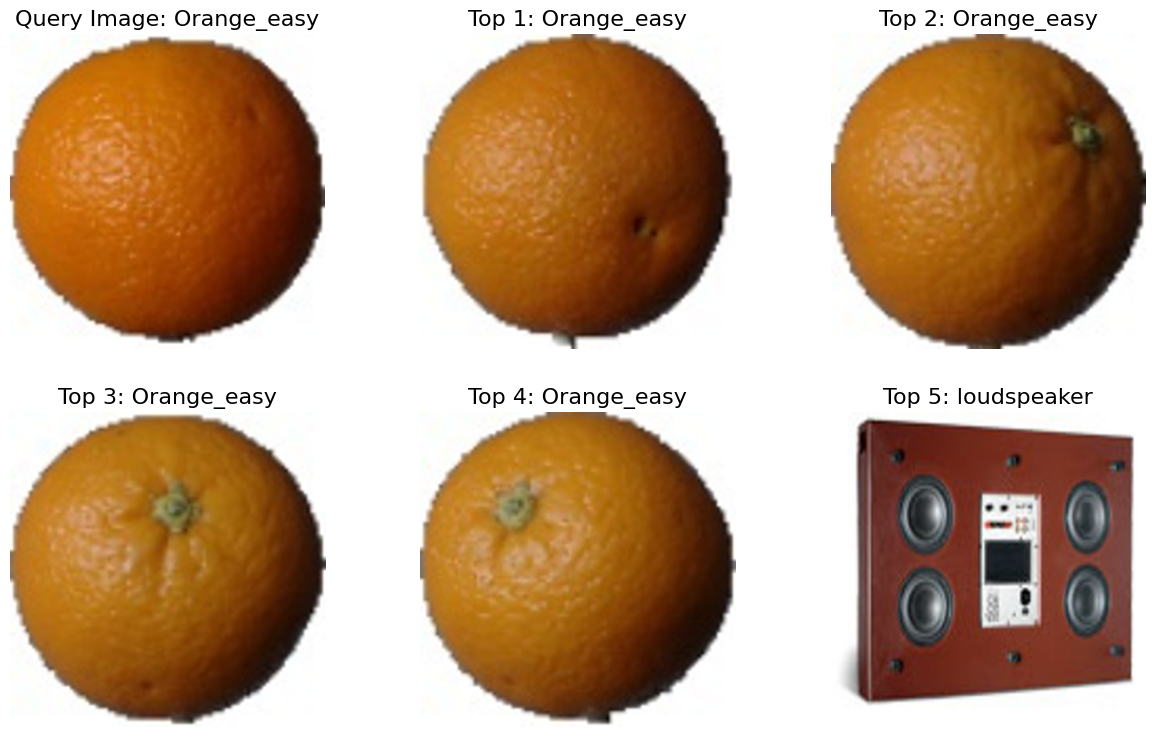

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [ ]:
ls_path_score[:5]

[('data/train/castle/n02980441_2971.JPEG', 62932042.0),
 ('data/train/castle/n02980441_2252.JPEG', 50331458.0),
 ('data/train/castle/n02980441_9457.JPEG', 54050824.0),
 ('data/train/castle/n02980441_1399.JPEG', 47608406.0),
 ('data/train/castle/n02980441_5253.JPEG', 57399739.0)]

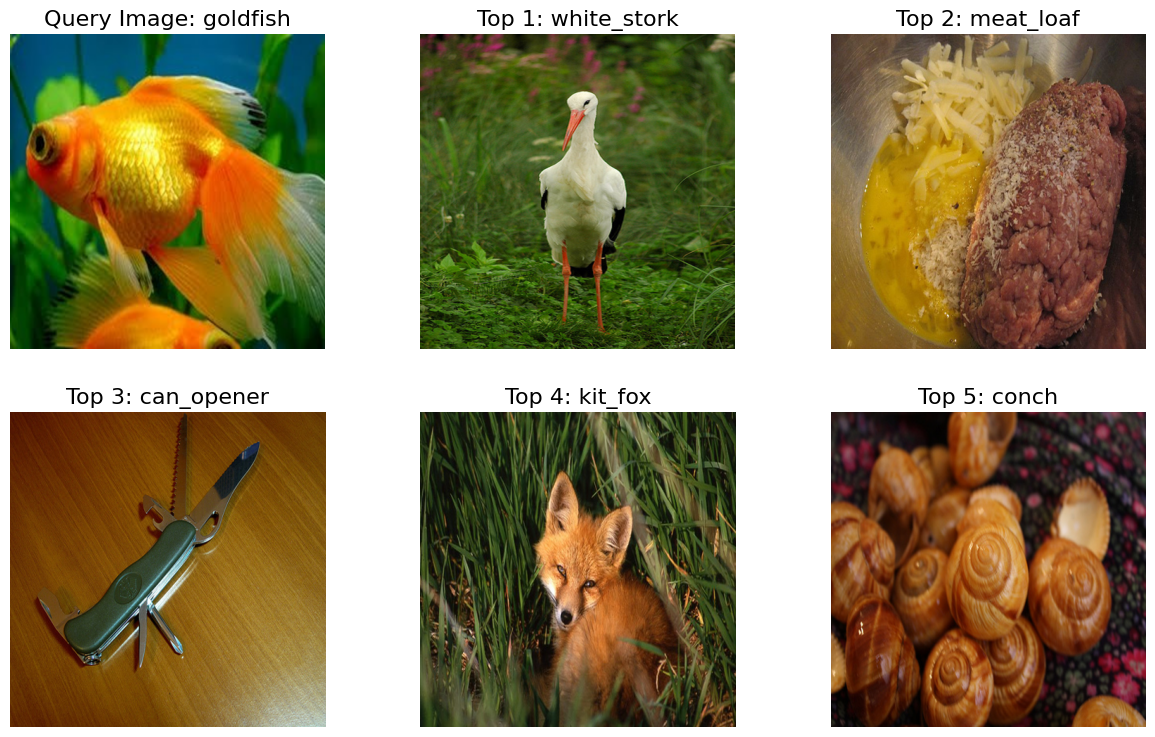

In [ ]:
root_img_path = f"{ROOT}/train/"
#query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
query_path = f"{ROOT}/test/goldfish/n01443537_3883.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

**6. Mean Square Difference**

In [ ]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.mean((data - query)**2, axis=axis_batch_size)

In [ ]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

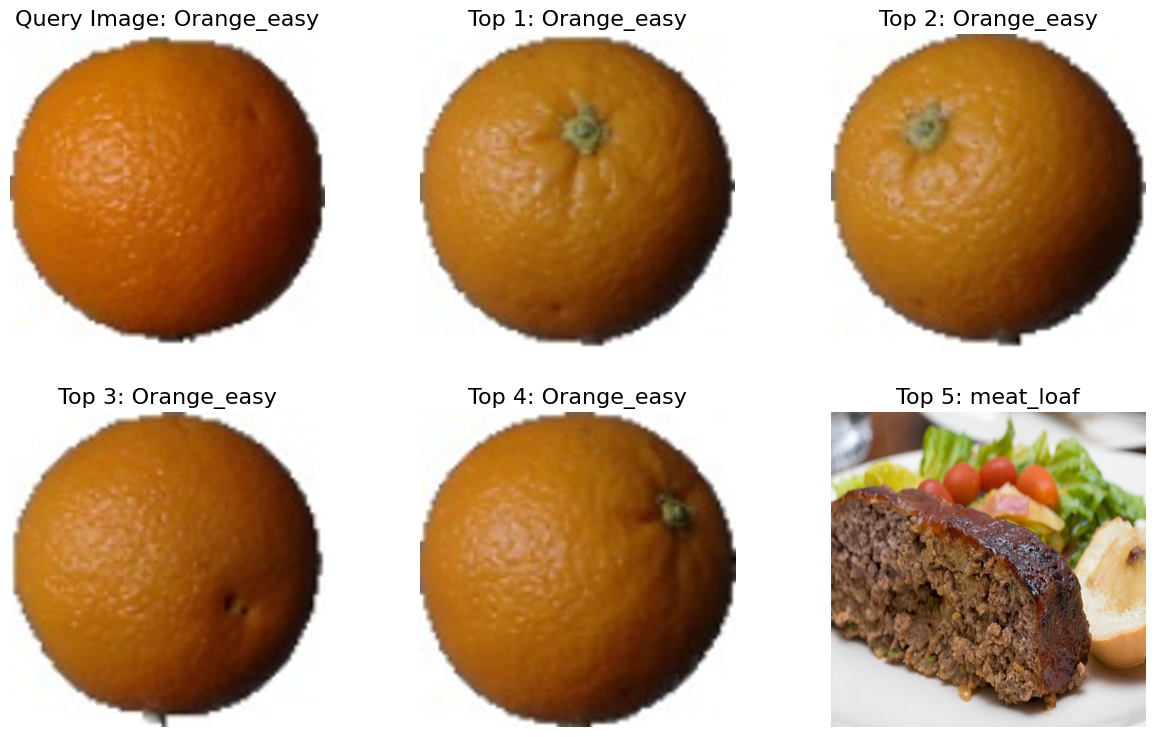

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

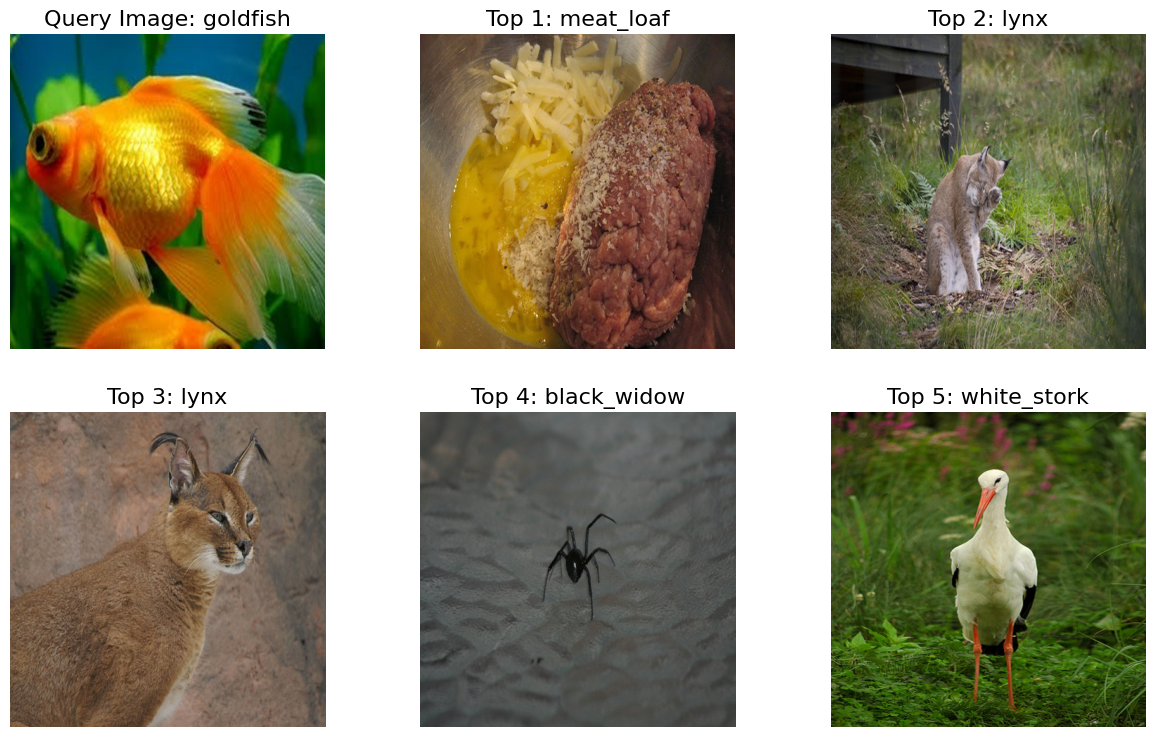

In [ ]:
root_img_path = f"{ROOT}/train/"
#query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
query_path = f"{ROOT}/test/goldfish/n01443537_3883.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

**7. Cosine Similarity**

In [ ]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [ ]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

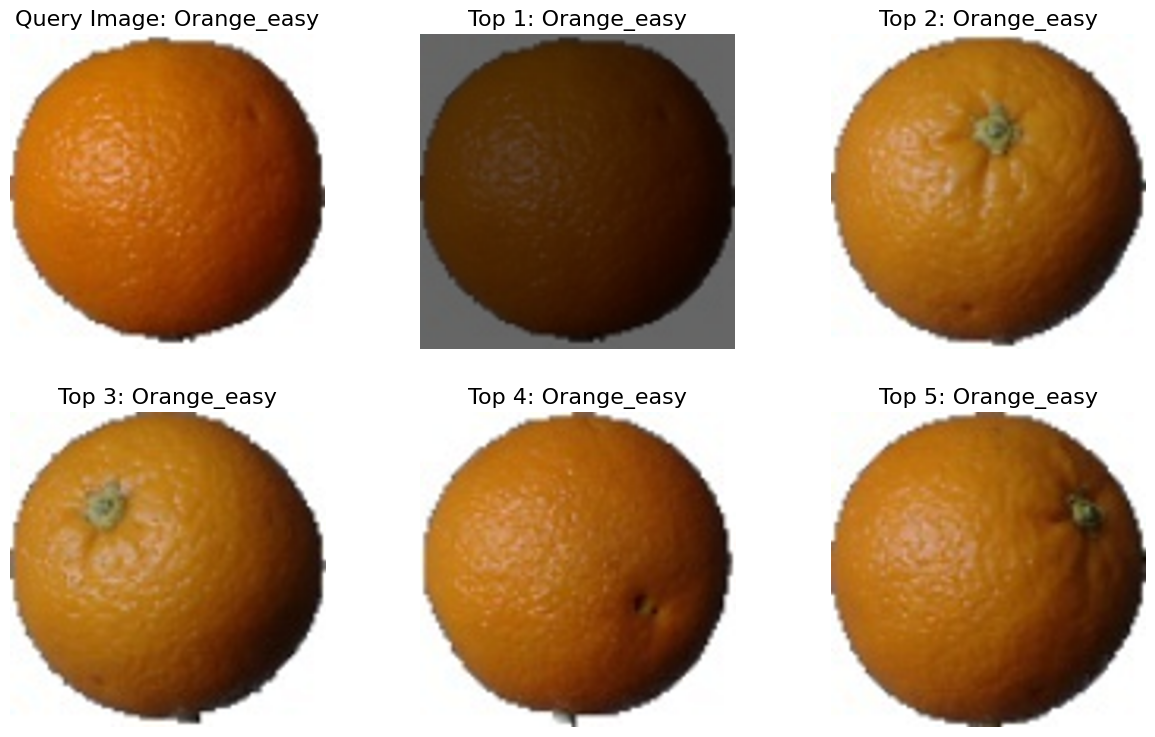

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

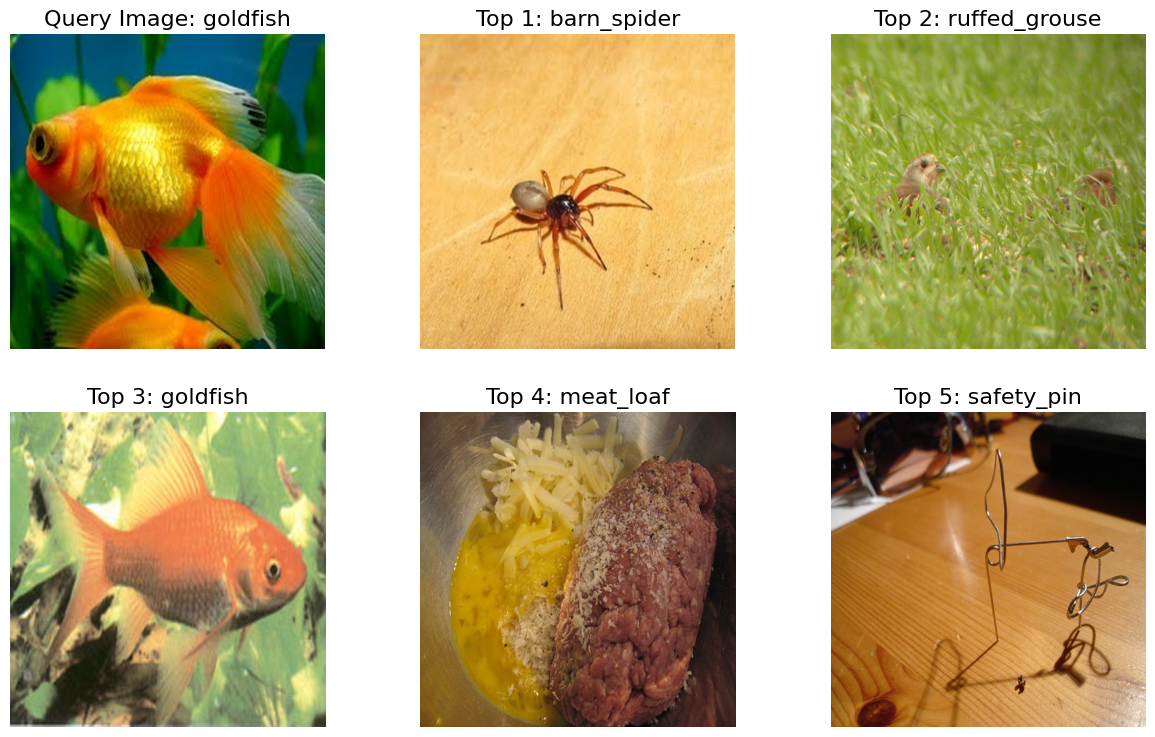

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/goldfish/n01443537_3883.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

**8. Correlation Coefficient**

In [ ]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [ ]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

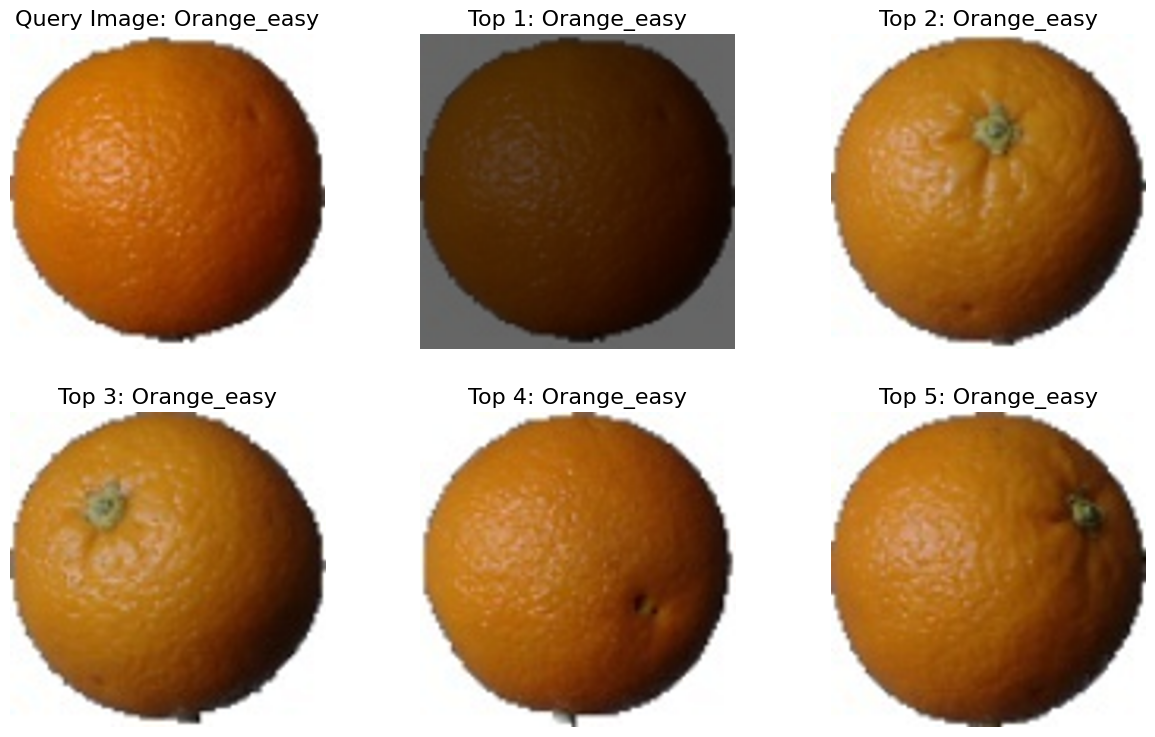

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

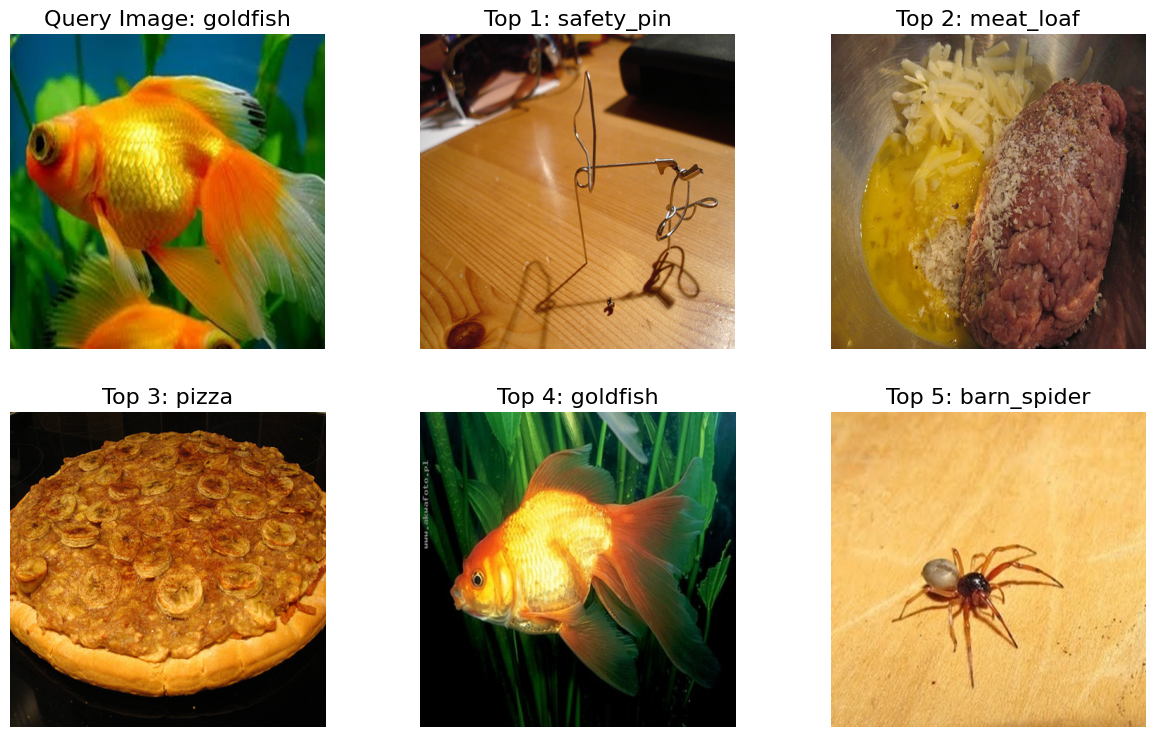

In [ ]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/goldfish/n01443537_3883.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)